<a href="https://colab.research.google.com/github/prvshkmr/prvshkmr.github.io/blob/main/Stroke_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Prediction**

In [2]:
# Connecting to drive

from google.colab import drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/PRML_Project/'
data_path = folder_path + 'healthcare-dataset-stroke-data.csv'



Mounted at /content/drive


In [3]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [20]:
def missing(df):
  missing_number = df.isnull().sum().sort_values(ascending=False)
  missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  missing_values = pd.concat([missing_number,missing_percent],axis=1,keys=['Missing_Number','Missing_Percent'])
  return missing_values

Data Gathering

In [4]:
df = pd.read_csv(data_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data Preparation

In [10]:
df.columns = df.columns.str.lower().str.replace('&','_').str.replace(' ','_')
df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df.shape

(5110, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [15]:
df.describe(include=object).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [17]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [18]:
df.duplicated().value_counts()

False    5110
Name: count, dtype: int64

In [21]:
missing(df)

,Missing_Number,Missing_Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
residence_type,0,0.000000
avg_glucose_level,0,0.000000


Data Cleaning

In [22]:
df.drop('id',axis=1,inplace=True)

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

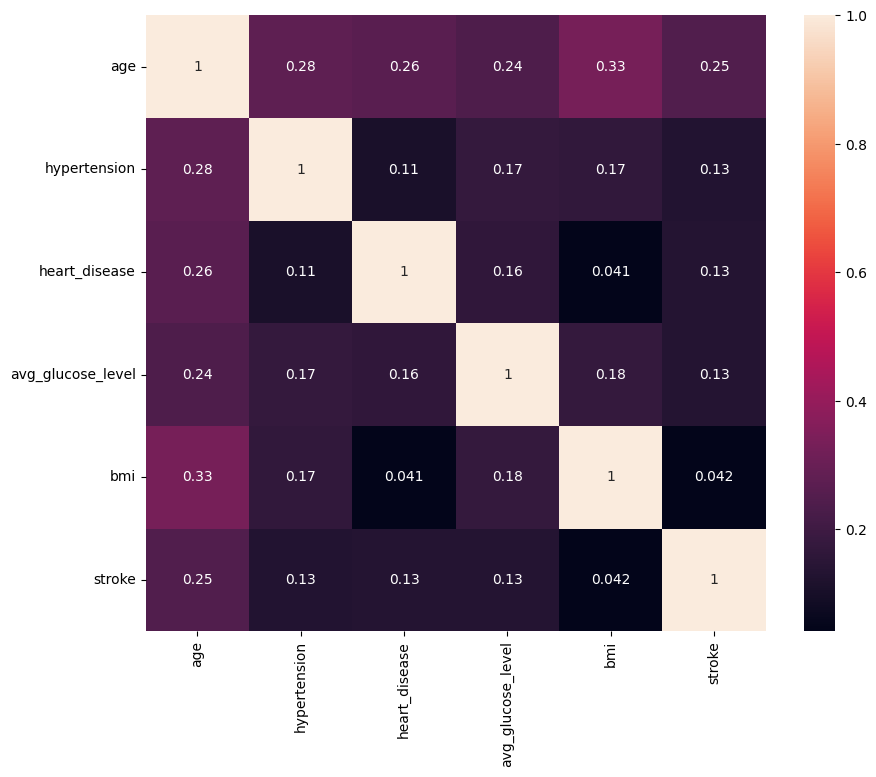

In [28]:
# One-liner to handle non-numeric data, encode with one-hot, and create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns

# One-hot encode non-numeric columns, drop remaining non-numeric columns, and create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.get_dummies(df, columns=non_numeric_columns).select_dtypes(include=['float', 'int']).corr(), annot=True)
plt.show()



In [29]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


In [31]:
#defiging some subusable functions
def first_looking(col):
  print("column name  :", col)
  print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
  print("num_of_nulls   : ", df[col].isnull().sum())
  print("num_of_uniques : ", df[col].nunique())
  print(df[col].value_counts(dropna = False))

In [32]:
first_looking("stroke")

column name  : stroke
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
stroke
0    4861
1     249
Name: count, dtype: int64


In [33]:
df['stroke'].describe()

count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

In [34]:
# Print the skewness of the 'stroke' column
print(f"Skewness: {df['stroke'].skew()}")  # Skewness indicates the asymmetry of the distribution of data in the 'stroke' column

Skewness: 4.193284486071313


<Axes: ylabel='Frequency'>

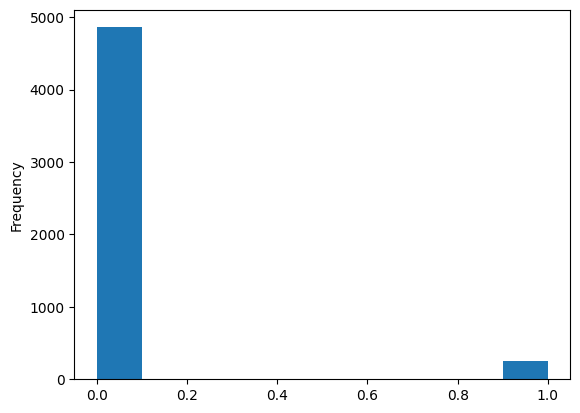

In [47]:
# Plot a histogram of the 'stroke' column with custom y-axis range
df['stroke'].plot(kind='hist')


In [49]:
df[numerical].head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


In [50]:
df[numerical].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612647,0.296607,0.226063,45.283560,7.854067
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


array([[<Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>]], dtype=object)

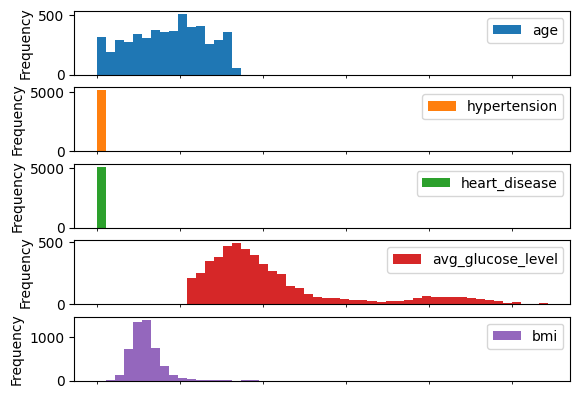

In [61]:
df[numerical].plot(kind='hist', subplots=True, bins=50, layout=(len(numerical), 1), xticks=[], xlabel='')


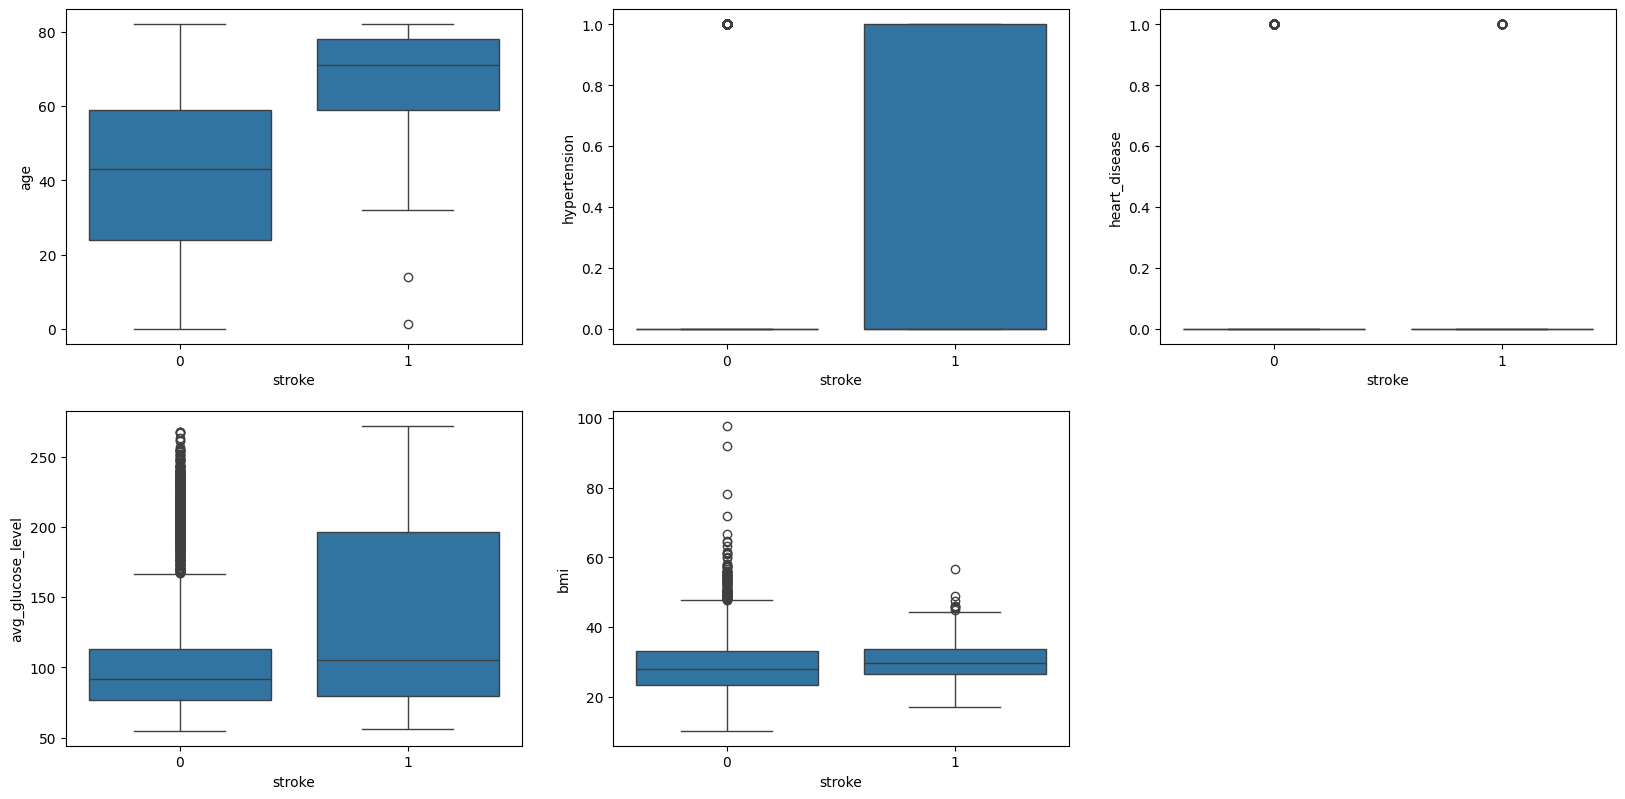

In [62]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke',y=feature,data=df)

In [63]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

heart_disease        3.947244
hypertension         2.715392
avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

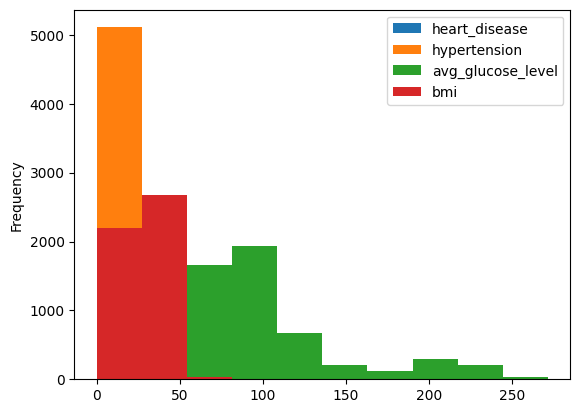

In [65]:
df[skew_cols.index].plot(kind='hist');

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

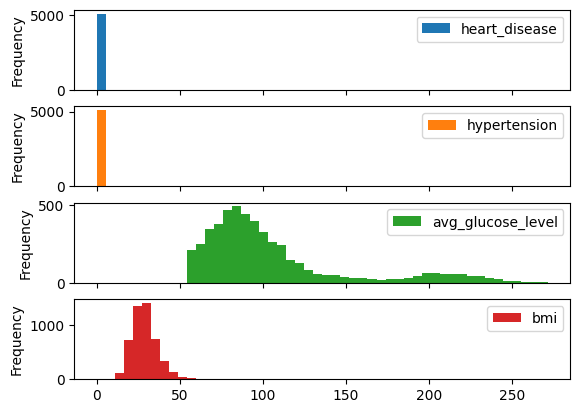

In [66]:
df[skew_cols.index].plot(kind='hist',subplots=True,bins=50)

In [67]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols = skew_cols.drop(['heart_disease', 'hypertension'])
skew_cols

avg_glucose_level    1.572284
bmi                  1.055340
dtype: float64

avg_glucose_level    0.889470
bmi                  0.031913
dtype: float64



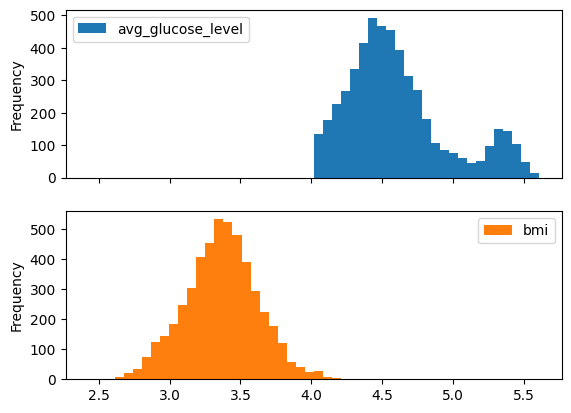

In [69]:
df_try = df.copy()
df_try = df[skew_cols.index].copy()
for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)
print(df_try[skew_cols.index].skew())
print()
df_try[skew_cols.index].plot(kind='hist',subplots=True,bins=50);

# **K-Nearest Neighbors (KNN)**

# **Support Vector Machines (SVM)**

# **Decision Tree**

# **Logistic Regression**